# Logistic Regression

In [2]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

### Logistic function


# $f(x)={\frac {1}{1+e^{-x}}}.$ 

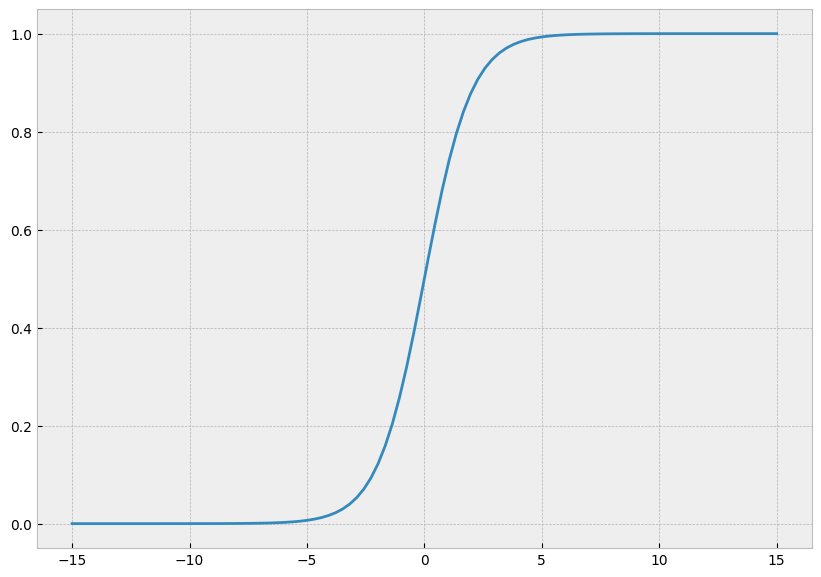

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-15,15,100)
plt.plot(x, sigmoid(x));

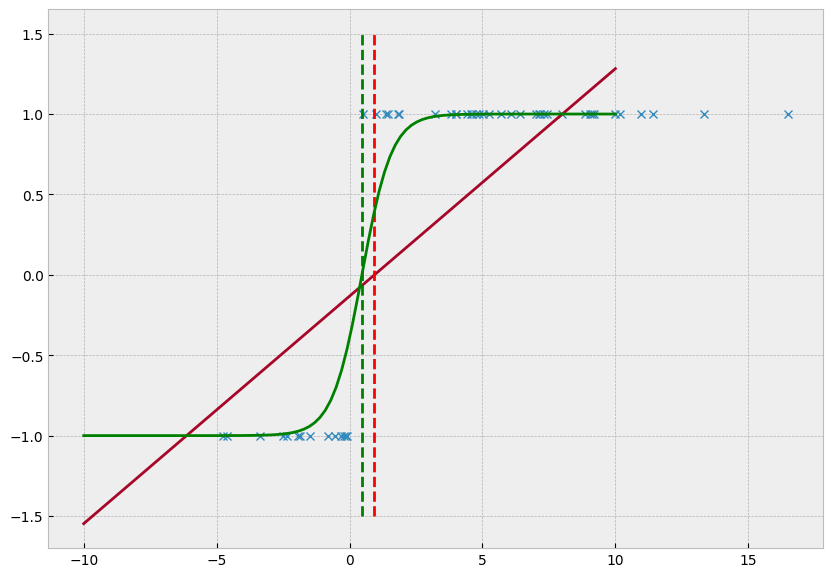

In [4]:
X = np.random.normal(5, 5, size=(50,1))
y0 = X[:,0]>0
y = y0.ravel()*2-1

# linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)
test_X=np.linspace(-10,10,100).reshape(-1,1)
plt.plot(X, y, 'x');
plt.plot(test_X, regr.predict(test_X))
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--')


# logistic regression
clf = linear_model.LogisticRegression()
clf.fit(X,y)
plt.plot(test_X, 2*sigmoid(test_X @ clf.coef_ +clf.intercept_)-1, 'g');
plt.plot([-clf.intercept_/clf.coef_[0]]*2, [-1.5,1.5], 'g--');

Logistic regression experiment



Use Iris dataset https://en.wikipedia.org/wiki/Iris_flower_data_set

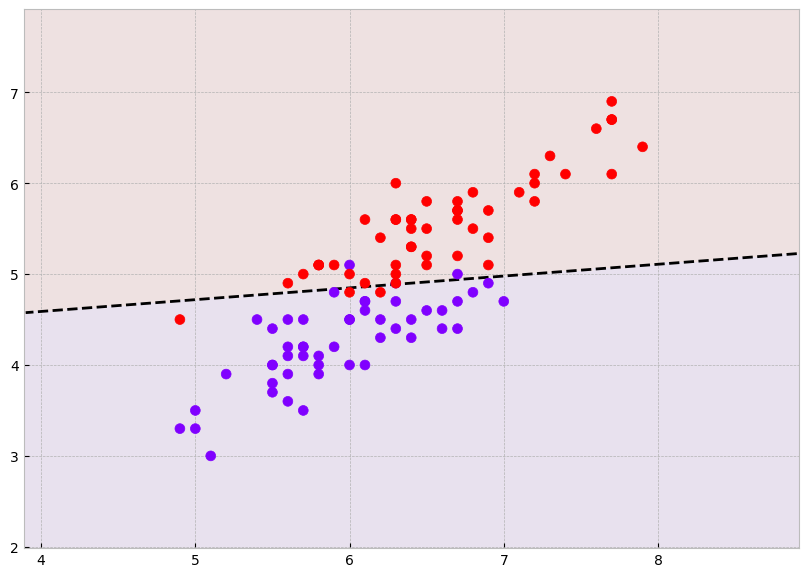

In [5]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# use only y=0,2 (for doing binary classification) and first two features of X (easier for visualization)
X = X[y!=0, ::2]
y = y[y!=0]
clf = linear_model.LogisticRegression()
clf.fit(X, y)

# boundary
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# mesh grid
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# compute logistic prediction on grid points
Z = clf.decision_function(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

# plot color and boundary
plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.05)
plt.contour(grid[0], grid[1], Z, colors=['k'], linestyles=['--'],
                levels=[0])

# lable the sample points
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=50);


## Q
* different settings

### Multi class

In [34]:
Z

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

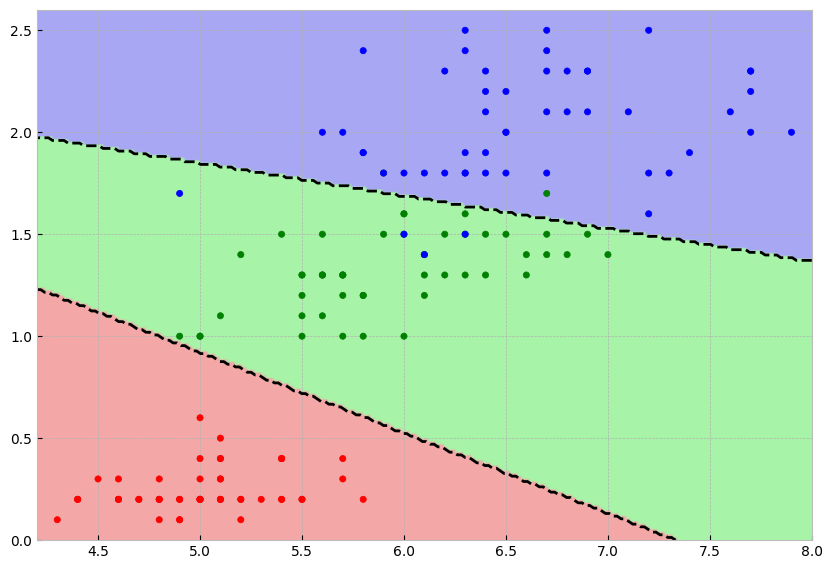

In [35]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# 只取兩個 features
# choose only two features
X = X[:, [0,3]]

clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X, y)

# 邊界
# boundary
x_min, y_min = X.min(axis=0)-0.1
x_max, y_max = X.max(axis=0)+0.1

# 座標點
# mesh grid
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)
# feature, x, y

# 在座標點 算出 logistic 的預測機率
# compute logistic prediction on grid points
# batch x feature
# 40000 x 2
Z = clf.predict_proba(grid.reshape(2, -1).T)
# the shape of Z is (40000, 3): batch x class
# 圖片
Z  = Z.reshape(200, 200, 3)
Z2 = np.zeros_like(Z)
for i in range(200):
    for j in range(200):
        Z2[i,j, Z[i,j].argmax()] = 1
Z = Z2
# a more elegant way to do the above loop is:
# Z2 = np.zeros_like(Z)
# Z2[np.arange(200), np.arange(200), Z.argmax(axis=2)] = 1
#Z = Z.swapaxes(0,1)[::-1, :]    

# 畫出顏色和邊界
# plot color and boundary
# we need to swap axes and reverse y-axis to make the plot look right
plt.imshow(Z.swapaxes(0,1)[::-1, :], extent=(x_min, x_max, y_min, y_max), alpha=0.3)
plt.contour(grid[0], grid[1], Z.argmax(axis=2), 
            colors=['k','k','k'], linestyles=['--'],levels=[0,1,2], alpha=1)

# 標出 sample 點
# lable the sample points
plt.scatter(X[:,0], X[:, 1],  c=["rgb"[i] for i in y], zorder=10, s=20);

## MNIST

In [36]:
import gzip
import pickle
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
    
train_X, train_y = train_set
test_X, test_y = test_set


In [48]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)

In [49]:
%%timeit -n 1 -r 1
clf.fit(train_X, train_y)

3.69 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


c:\Users\tzerj\anaconda3\envs\test1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(train_X) == train_y))

0.9342
124 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [51]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(test_X) == test_y))

0.9254
23.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q
* `multi_class ="ovr"` 
  ovr stands one vs rest

### Apply a random nonlinear transform
Extreme learning machine

In [52]:
28*28

784

In [57]:
# poly = PolynomialFeatures(degree=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
toyX = [[1,2], [0, 1], [1,0], [1,1]]
poly.fit_transform(train_X[:10]).shape

(10, 308505)

In [58]:
random_matrix = np.random.uniform(-1, 1,size=[784, 4096])

In [60]:
(train_X@random_matrix).shape

(50000, 4096)

In [59]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
train_X2 = np.tanh(train_X@random_matrix)
clf.fit(train_X2, train_y)

c:\Users\tzerj\anaconda3\envs\test1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [63]:
print(np.mean(clf.predict(train_X2) == train_y))

1.0


In [64]:
test_X2 = np.tanh(test_X@random_matrix)
print(np.mean(clf.predict(test_X2) == test_y))

0.9693


In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
train_y2 = np.eye(10)[train_y]

In [67]:
reg = LinearRegression()
reg.fit(train_X2, train_y2)

LinearRegression()

In [68]:
(reg.predict(train_X2).argmax(axis=1) == train_y).mean()

0.97628

In [69]:
(reg.predict(test_X2).argmax(axis=1) == test_y).mean()

0.9593